# Model Fitness

Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.

## Daftar Isi

* [Pendahuluan](#Pendahuluan)
* [Pra Pemrosesan Data](#Pra-Pemrosesan-Data)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
* [Model Klasifikasi Biner](#Model-Klasifikasi-Biner)
* [Membuat Klaster Pengguna](#Membuat-Klaster-Pengguna)
* [Kesimpulan](#Kesimpulan)

## Pendahuluan

Proyek ini akan menganalisa profil pelanggan pusat kebugaran dari dataset berisi data tingkat churn pelanggan untuk bulan tertentu dan informasi tentang bulan sebelumnya serta mengembangkan strategi retensi pelanggan.

### Tujuan

* Mempelajari cara memprediksi probabilitas churn (untuk bulan berikutnya) bagi setiap pelanggan
* Membuat segmentasi pengguna dengan memilih kelompok yang paling dominan, dan mendeskripsikan karakter utamanya
* Menganalisis faktor-faktor yang paling memengaruhi churn
* Menarik kesimpulan dasar dan memberikan rekomendasi terkait cara meningkatkan layanan pelanggan
* Mengidentifikasi kelompok yang ditargetkan
* Merekomendasikan langkah-langkah untuk mengurangi churn
* Menjelaskan pola lain terkait dengan interaksi pelanggan

### Tahapan

Proyek ini akan terdiri dari tahapan berikut:

* Pra-pemrosesan data
* Exploratory Data Analysis
* Model Klasifikasi Biner
* Membuat Klaster Pengguna

## Pra Pemrosesan Data

Pertama-tama, kita akan memuat semua library yang akan digunakan.

In [4]:
# Memuat library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Selanjutnya memuat dataset yang berisi profil atau informasi pelanggan pusat kebugaran Model Fitness.

In [5]:
# Memuat dataset 
try:
    df=pd.read_csv('/datasets/gym_churn_us.csv')
except:
    df=pd.read_csv('gym_churn_us.csv')

Kita akan menampilkan lima baris pertama dataset untuk peninjauan awal.

In [6]:
# Menampilkan lima baris pertama dataset
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [7]:
df.shape

(4000, 14)

Dataset di atas berisi 4000 baris dan 14 kolom/fitur dengan masing-masing sebanyak 7 fitur kategorik dan 7 fitur numerik.

Kolom-kolom numerik yang terdapat pada dataset yaitu:
* `Contract_period` — 1 bulan, 3 bulan, 6 bulan, atau 1 tahun
* `Age`
* `Avg_additional_charges_total`— jumlah total uang yang dikeluarkan untuk membayar layanan lain di pusat kebugaran: kafe, barang atletik, kosmetik, pijat, dll.
* `Month_to_end_contract`— sisa bulan sebelum kontrak berakhir
* `Lifetime`— waktu (dalam bulan) sejak kunjungan pertama pelanggan ke pusat kebugaran
* `Avg_class_frequency_total`— frekuensi rata-rata kunjungan per minggu selama masa hidup pelanggan
* `Avg_class_frequency_current_month`— frekuensi rata-rata kunjungan per minggu selama bulan sebelumnya

Sementara itu kolom-kolom kategoriknya adalah:
* `gender`
* `Near_location`— apakah pengguna tinggal atau bekerja di dekat lokasi pusat kebugaran
* `Partner` — apakah pengguna adalah karyawan perusahaan mitra
* `Promo_friends`— apakah pengguna awalnya melakukan pendaftaran melalui penawaran "ajak teman" (mereka menggunakan kode promo teman saat membayar keanggotaan pertama mereka)
* `Phone`— apakah pengguna memberikan nomor telepon mereka
* `Group_visits`— apakah pengguna mengambil bagian dalam sesi kelompok
* `Churn`— churn aktual untuk bulan terkait

Dari peninjauan awal, terdapat nama/judul kolom yang format penulisannya tidak konsisten. Kita akan mengubah semua nama kolom ke dalam format *lowercase*.

In [8]:
# Mengubah format nama kolom menjadi lowercase 
df.columns= df.columns.str.lower()

# Memeriksa perubahannya
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Seluruh nama kolom dalam dataset telah diubah ke dalam format *lowercase*.

In [9]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Berdasarkan informasi dataset, tipe data pada tiap kolom sudah sesuai. Selain itu tampaknya juga tidak terdapat nilai hilang, namun kita akan memeriksanya lagi. 

In [10]:
# Memeriksa nilai hilang
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

Tidak terdapat nilai yang hilang pada dataset ini.

In [11]:
# Memeriksa duplikat
df.duplicated().sum()

0

Tidak terdapat duplikat pada dataset ini.

## Exploratory Data Analysis

Pada tahap *Exploratory Data Analysis* kita akan mempelajari nilai rata-rata dan standar deviasi data. 

In [12]:
# Mempelajari nilai data
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Dari ringkasan statistik di atas:
* Rata-rata gender 0,51 dapat mengindikasikan bahwa jumlah pengguna laki-laki dan perempuan di Model Fitness hampir seimbang.
* Rata-rata dan median usia pengguna adalah 29 tahun.
* Lifetime terlama pelanggan adalah 31 bulan. Akan tetapi rata-ratanya cukup singkat yaitu 3,7 bulan.
* Nilai standar deviasi pada kolom `avg_additional_charges_total` tergolong tinggi menandakan data yang terdispersi jauh dari rata-rata. Hal ini mungkin dikarenakan adanya pelanggan yang mengeluarkan biaya yang sangat tinggi untuk layanan tambahan dan adanya pelanggan yang mengeluarkan biaya sangat sedikit atau bahkan hampir tidak ada.

Selanjutnya kita akan mengelompokkan dataset berdasarkan kolom `churn` yaitu pengguna yang berhenti menggunakan layanan dan pengguna yang masih bertahan.

In [13]:
# Melihat nilai rata-rata fitur pada dataset yang dikelompokkan berdasarkan kolom `churn`
df_churn = df.groupby('churn').mean()

df_churn

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Secara umum dapat dilihat bahwa pengguna yang masih bertahan kebanyakan adalah yang berasal dari karyawan perusahaan mitra, memiliki periode kontrak yang lebih panjang, memakai kode promo/*referral* dari teman pada saat mendaftar, mengunjungi pusat kebugaran bersama teman/berkelompok, menghabiskan lebih banyak biaya untuk layanan tambahan, serta memiliki frekuensi kunjungan yang lebih sering.

### Histogram & Distribusi Fitur

Pada bagian ini kita akan menampilkan histogram untuk kolom-kolom yang memiliki fitur numerik. 

In [14]:
# Mengumpulkan fitur-fitur numerik
num_col = ['contract_period',
                'age',
                'avg_additional_charges_total',
                'month_to_end_contract',
                'lifetime',
                'avg_class_frequency_total',
                'avg_class_frequency_current_month']

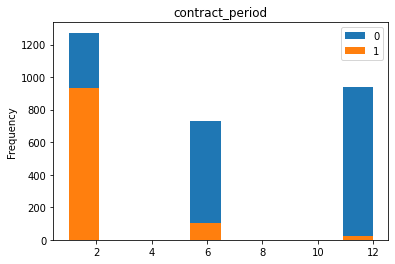

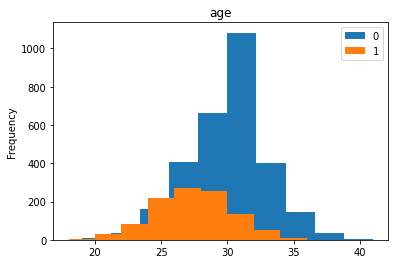

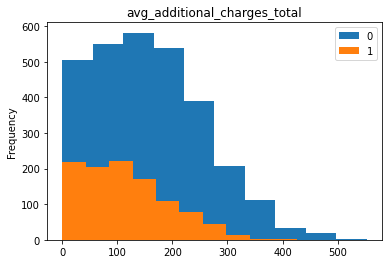

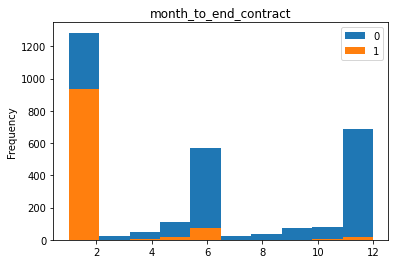

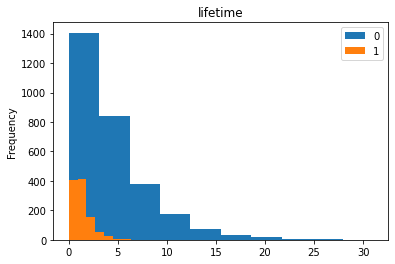

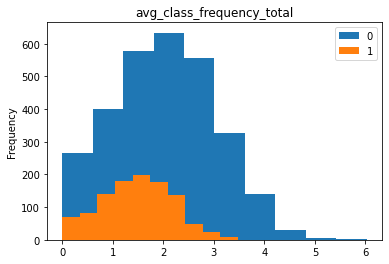

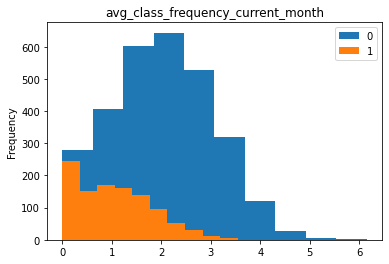

In [15]:
# Membuat fungsi untuk plot histogram
for col in num_col:
    df.groupby('churn')[col].plot.hist()
    plt.title(col)
    plt.legend()
    plt.show()

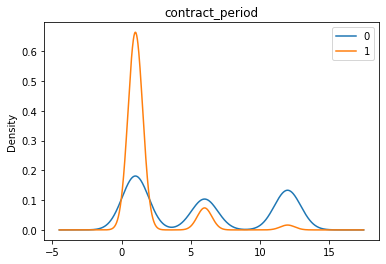

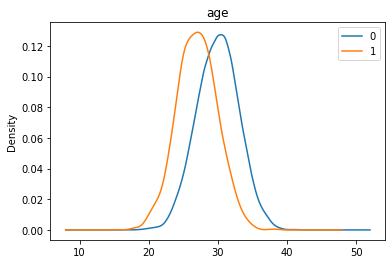

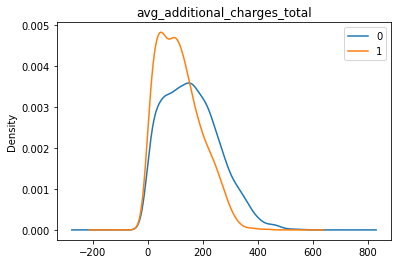

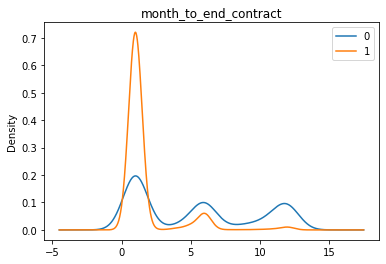

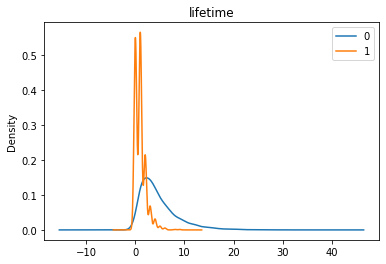

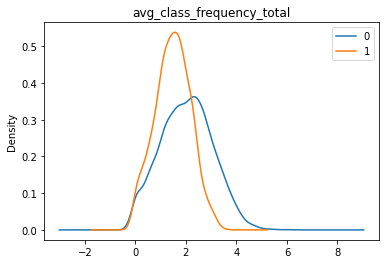

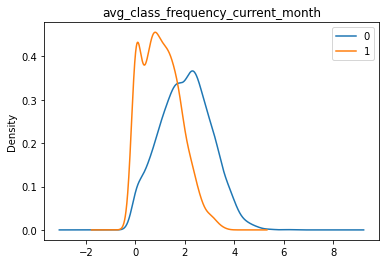

In [16]:
# Membuat distribusi fitur
for col in num_col:
    df.groupby('churn')[col].plot.density()
    plt.legend()
    plt.title(col)
    plt.show()

Dari plot histogram dan density di atas, dapat dilihat bahwa:
* Mayoritas pengguna yang berhenti menggunakan layanan mendaftar untuk periode kontrak yang paling singkat.
* Pengguna yang masih bertahan kebanyakan berusia lebih tua dibanding pengguna yang berhenti menggunakan layanan.
* Pengguna yang berhenti menggunakan layanan mengeluarkan lebih sedikit biaya tambahan dibanding pengguna yang masih bertahan.
* Frekuensi kehadiran pengguna yang telah berhenti menggunakan layanan lebih jarang dibanding pengguna yang masih bertahan.

### Matriks Korelasi

Selanjutnya kita akan membuat matriks korelasi untuk melihat hubungan antar fitur.

In [17]:
# Membuat matriks korelasi
df_cor = df.corr().round(4)
df_cor

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.0000,0.0067,-0.0105,-0.0050,-0.0085,0.0005,0.0179,0.0138,-0.0093,-0.0013,0.0136,0.0146,0.0092,0.0007
near_location,0.0067,1.0000,-0.0051,0.2110,-0.0158,0.1502,0.1547,0.0584,0.0408,0.1440,0.0709,0.0431,0.0627,-0.1281
partner,-0.0105,-0.0051,1.0000,0.4520,0.0100,0.3062,0.0227,0.0475,0.0229,0.2946,0.0612,0.0249,0.0456,-0.1580
promo_friends,-0.0050,0.2110,0.4520,1.0000,0.0020,0.2446,0.1202,0.0501,0.0369,0.2396,0.0727,0.0281,0.0538,-0.1622
phone,-0.0085,-0.0158,0.0100,0.0020,1.0000,-0.0069,-0.0101,-0.0114,0.0093,-0.0112,-0.0188,0.0083,0.0134,-0.0012
contract_period,0.0005,0.1502,0.3062,0.2446,-0.0069,1.0000,0.1700,0.1382,0.1114,0.9731,0.1707,0.0962,0.1594,-0.3900
group_visits,0.0179,0.1547,0.0227,0.1202,-0.0101,0.1700,1.0000,0.0809,0.0321,0.1637,0.0759,0.0567,0.0759,-0.1753
age,0.0138,0.0584,0.0475,0.0501,-0.0114,0.1382,0.0809,1.0000,0.0802,0.1345,0.1647,0.1200,0.1831,-0.4047
avg_additional_charges_total,-0.0093,0.0408,0.0229,0.0369,0.0093,0.1114,0.0321,0.0802,1.0000,0.1140,0.0790,0.0444,0.0796,-0.1987
month_to_end_contract,-0.0013,0.1440,0.2946,0.2396,-0.0112,0.9731,0.1637,0.1345,0.1140,1.0000,0.1611,0.0854,0.1476,-0.3814


Setelah memperoleh tabel matriks korelasi, kita akan membuat sebuah *heatmap* untuk visualisasi.

<AxesSubplot:>

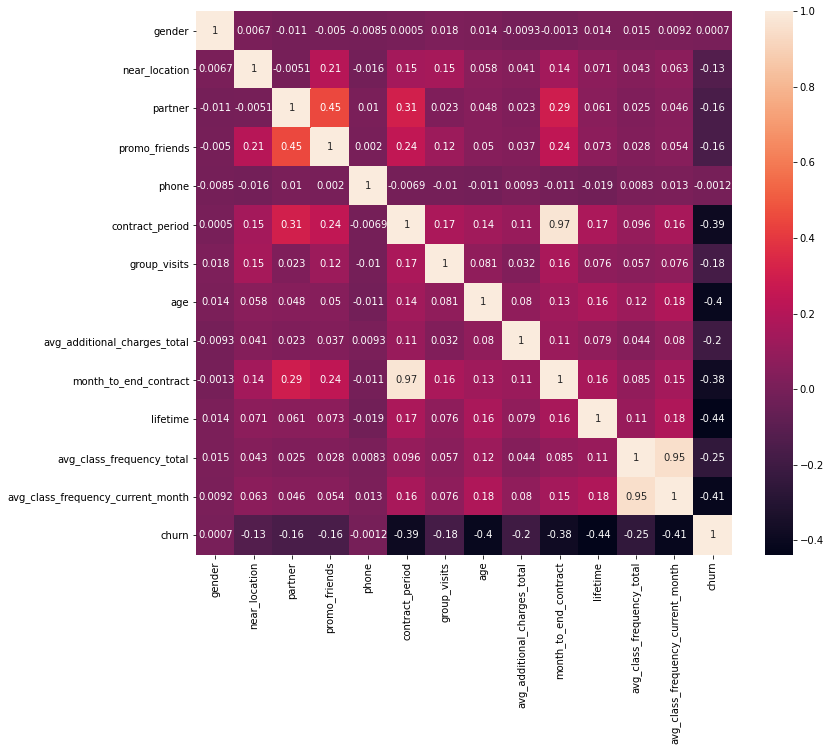

In [18]:
# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(12,10))
sns.heatmap(df_cor, annot=True)


Dari *heatmap* diatas, kita dapat melihat bahwa fitur-fitur yang memiliki korelasi yang tinggi yaitu: 
* **month_to_end_contract** dan **contract_period** dengan koefisien 0,97. 
* **average_class_frequency_current_month** dan **average_class_frequency_total** dengan koefisien 0,95.

## Model Klasifikasi Biner

Kita akan membuat model klasifikasi biner untuk pelanggan di mana fitur targetnya adalah pengguna yang akan keluar bulan depan.

In [19]:
# Menetapkan X dan y
X = df.drop(columns='churn', axis=1)
y = df['churn']

Setelah menetapkan X dan y, selanjutnya data akan dibagi kedalam train set dan validation set dengan proporsi 80:20.

In [20]:
# Membagi data menjadi train set dan validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

### Logistic Regression

Kita akan menggunakan model Logistic Regression untuk memprediksi fitur target yang bersifat kategorik dalam hal ini yaitu churn atau pengguna yang akan keluar di bulan berikutnya.

In [21]:
# Menentukan algoritma model
model = LogisticRegression(random_state=0, max_iter =450)

In [22]:
# Melatih model pada train set dengan Logistic Regression
model.fit(X_train, y_train)

LogisticRegression(max_iter=450, random_state=0)

In [23]:
# prediksi biner
predictions = model.predict(X_test)

In [24]:
# accuracy, precision, recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.86
Recall: 0.83


Model ini memberikan prediksi yang benar untuk sekitar 92% jawaban.

### Random Forest Classifier

Selain *Logistic Regression*, kita akan mencoba menggunakan model *Random Forest Classifier*.

In [25]:
# Menentukan algoritma model
model = RandomForestClassifier(random_state=0)

In [26]:
# Melatih model pada train set dengan Random Forest classifier
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
# prediksi biner
predictions = model.predict(X_test)

In [28]:
# accuracy, precision, recall
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.82


Kedua metode/model memberikan hasil yang hampir mirip, namun model *Logistic Regression* memiliki nilai *accuracy*, *precision* dan *recall* yang lebih tinggi dibanding *Random Forest Classifier*.

## Membuat Klaster Pengguna

### Standarisasi data

Kita perlu melakukan standarisasi data sebelum memasukannya ke dalam algoritme.

In [29]:
# Membuat objek kelas scaler (normalizer)
sc = StandardScaler()

# Melatih normalizer dan mentransformasi dataset 
x_sc = sc.fit_transform(df)

### Membuat Grafik Dendrogram

Metode linkage digunakan untuk menampilkan *hierarchical/agglomerative clustering*.

In [49]:
linked = linkage(x_sc, method='ward')

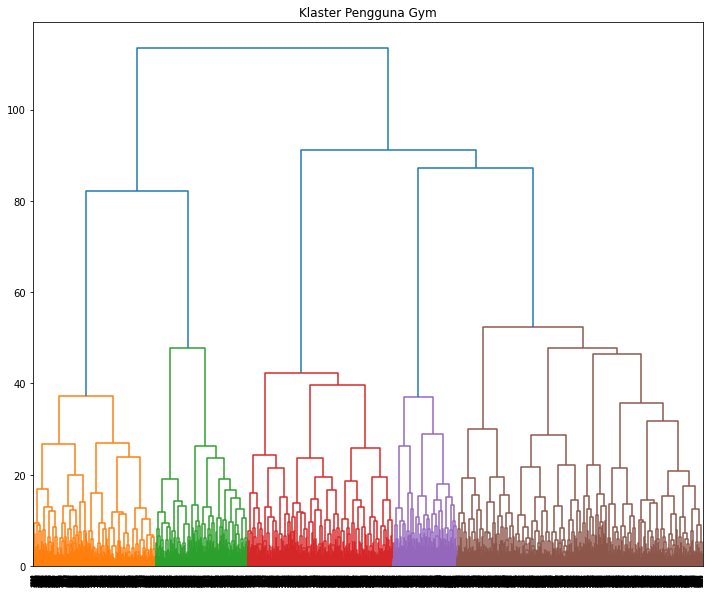

In [50]:
# Membuat grafik dendrogram
plt.figure(figsize=(12,10))
dendrogram(linked, orientation='top')
plt.title('Klaster Pengguna Gym')
plt.show()

Jumlah kelompok optimal yang disarankan sebanyak 5 kelompok dilihat dari jumlah warna-warna yang berbeda pada dendrogram.

### KMeans

Metode KMeans mengelompokkan titik data yang memiliki kesamaan dan menemukan pola yang tersembunyi.

In [66]:
# Melakukan standarisasi data
sc = StandardScaler()
X_sc = sc.fit_transform(df)

# Menetapkan jumlah klaster sebanyak 5
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc)

In [67]:
# Menyimpan label klaster ke dalam kolom dataset
df['cluster_km'] = labels 

In [68]:
# Menghitung nilai rata-rata tiap fitur berdasarkan klaster
df.groupby('cluster_km').mean().round(2)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.51,1.00,0.33,0.22,0.90,1.61,0.29,26.95,114.16,1.56,0.97,1.48,1.05,1.00
1,0.47,1.00,0.43,0.29,0.89,2.84,0.42,30.01,151.39,2.63,4.79,1.18,1.18,0.00
2,0.55,0.95,0.36,0.25,0.92,2.82,0.47,30.11,161.85,2.59,4.77,2.97,2.98,0.00
3,0.51,0.95,0.77,0.55,0.90,11.33,0.56,29.90,164.32,10.40,4.70,2.01,2.01,0.02
4,0.50,0.00,0.47,0.07,0.91,2.16,0.21,28.42,132.10,2.04,2.67,1.60,1.40,0.47


Setelah mengelompokkan dataset berdasarkan klaster, dapat dilihat bahwa klaster 3 memiliki perbedaan paling mencolok dibanding klaster lain dalam hal `partner`, `promo_friends`, `contract_period`, `group_visits`, `avg_additional_charges_total` dan `month_to_end_contract`.

Kita akan membuat plot density untuk melihat distribusi tiap fitur pada tiap klaster.

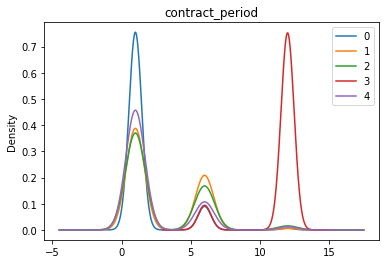

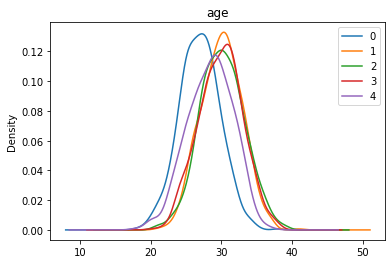

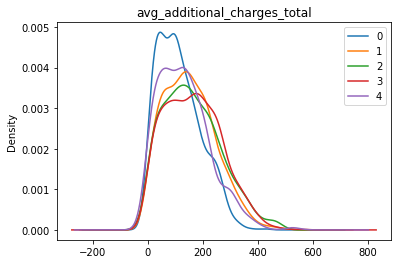

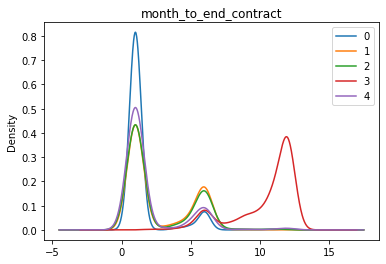

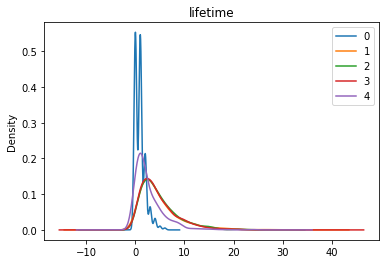

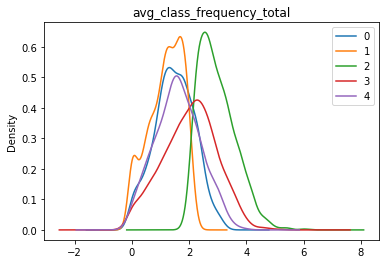

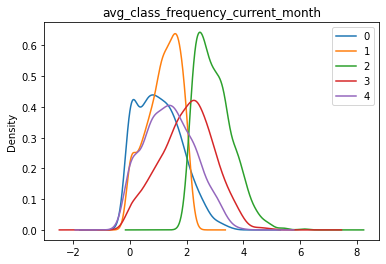

In [69]:
# Membuat distribusi fitur berdasarkan cluster
for col in num_col:
    df.groupby('cluster_km')[col].plot.density()
    plt.legend()
    plt.title(col)
    plt.show()

Dari grafik distribusi fitur pada tiap klaster dapat dilihat bahwa:
* Klaster 0 memiliki periode kontrak paling singkat (1 bulan), sedangkan kebalikannya yaitu pada klaster 3 yang memiliki rata-rata periode kontrak paling panjang (12 bulan).
* Umur pengguna yang tergolong dalam klaster 0 jauh lebih muda dibandingkan dengan pada klaster lainnya. Rata-rata umur pengguna relatif sama untuk klaster 1,2,3 dan 4. 
* Pengguna klaster 0 menghabiskan paling sedikit uang untuk untuk layanan tambahan dibanding pengguna pada klaster lainnya. 
* Sisa bulan sebelum berakhirnya kontrak adalah paling singkat untuk klaster 0. Hal ini cukup masuk akal karena pengguna pada klaster 0 mengambil kontrak yang paling singkat.
* `Lifetime` atau jumlah bulan sejak kunjungan pertama untuk pengguna klaster 0 terlihat paling singkat dan sangat bervariasi dilihat dari bentuknya yang sangat bergerigi.
* Rata-rata pengguna yang termasuk dalam klaster 2 adalah yang paling rajin mendatangi pusat kebugaran.

### Menghitung *Churn Rate*

Kita akan menghitung *churn rate* atau persentase pelanggan yang berhenti menggunakan layanan untuk tiap klaster.

In [70]:
# Menghitung jumlah pengguna pada tiap klaster
cluster_count = df.groupby('cluster_km').count()['churn']
cluster_count

cluster_km
0     796
1     829
2     827
3    1026
4     522
Name: churn, dtype: int64

Klaster 3 merupakan klaster yang paling dominan. Klaster ini mempunyai karakteristik sebagai berikut:
* Mendaftar untuk periode kontrak yang panjang (umumnya 1 tahun).
* Penggunanya didominasi oleh karyawan perusahaan mitra.
* Menggunakan kode promo/referral dari teman pada saat pendaftaran.
* Kunjungan lebih banyak dilakukan secara berkelompok.
* Paling banyak mengeluarkan biaya untuk layanan tambahan.
* Memiliki rata-rata frekuensi kehadiran yang paling sering setelah klaster 2.

In [71]:
# Menghitung churn rate
churn_rate = df.groupby('cluster_km').sum()['churn']/cluster_count*100
churn_rate

cluster_km
0    99.874372
1     0.120627
2     0.362757
3     1.656920
4    46.934866
Name: churn, dtype: float64

Klaster 0 memiliki tingkat churn yang paling tinggi yaitu 99,8%. Hampir seluruh pelanggan yang memiliki tipikal/perilaku khas seperti pelanggan klaster 0 pada akhirnya kemungkinan berhenti menggunakan layanan. Sementara itu klaster 1 memiliki churn rate terendah.

## Kesimpulan 

1. Dari analisa dataset terdapat beberapa faktor-faktor yang paling memengaruhi churn yaitu:
    * Kunjungan berkelompok (*group visit*) memiliki pengaruh terhadap churn dalam kaitannya dengan motivasi pengguna. Dua klaster dengan tingkat churn tertinggi (klaster 0 dan 4) merupakan klaster dengan rata-rata kunjungan berkelompok paling rendah. Pada umumnya pengguna lebih termotivasi untuk datang ke pusat kebugaran apabila bersama rekan-rekannya. Datang ke pusat kebugaran sendiri mungkin cukup mengintimidasi bagi sebagian orang khususnya pemula karena adanya kekhawatiran akan diperhatikan/dinilai oleh orang lain.
    * Pengguna dengan periode kontrak yang paling singkat (1 bulan) memiliki *churn rate* paling tinggi. Pengguna yang termasuk golongan ini kemungkinan besar adalah pengguna baru/pemula yang kemudian memutuskan tidak memperpanjang layanan.  
    * Rata-rata frekuensi kehadiran pelanggan. Pelanggan yang sering mendatangi pusat kebugaran umumnya memiliki motivasi yang tinggi atau sudah memiliki kebiasaan berolahraga secara rutin.
    * Karyawan perusahaan mitra memiliki tingkat churn paling rendah yang mungkin disebabkan karena mendapatkan diskon. Keuangan dapat menjadi alasan kembali/tidaknya pengguna untuk memperpanjang layanan.
    * Lokasi juga mempengaruhi churn, dalam hal ini tingkat churn rate tertinggi kedua adalah pada klaster 4 yang penggunanya berlokasi jauh dari pusat kebugaran. 


2. Klaster yang cenderung akan tetap setia yaitu:
   * Klaster 2, karena penggunanya rajin datang ke pusat kebugaran dan dapat dikatakan memiliki motivasi yang kuat.
   * Klaster 3, karena penggunanya adalah karyawan perusahaan mitra.
   * Klaster 1, didominasi oleh perempuan yang umumnya lebih sering mendatangi pusat kebugaran secara berkelompok.
   

3. Model *Logistic Regression* lebih baik untuk digunakan dalam memprediksi churn rate bulan berikutnya.


**Rekomendasi langkah-langkah untuk mengurangi churn/meningkatkan retensi pelanggan:**
* Membangun rasa saling memiliki (*sense of community*) misalnya dengan membuat grup khusus anggota pusat kebugaran Model Fitness di Whatsapp atau media sosial. Dengan ini pengguna dapat saling mengenal dan juga membantu para pengguna baru agar tidak merasa asing saat datang ke pusat kebugaran.
* Mengapresiasi member yang rajin datang ke pusat kebugaran, misalnya dengan memberi reward/diskon spesial untuk pengguna yang memposting kegiatan pusat kebugaran di media sosial atau mendatangkan pelanggan dengan kode promo/referral.
* Meningkatan kualitas *experience* pelanggan misalnya dengan menyediakan *trainer* yang akan membimbing pengguna baru, senantiasa memperbarui variasi *workout* agar pengguna tidak bosan, serta memastikan fasilitas/peralatan berfungsi dengan baik.